In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [39]:
data = pd.read_csv('gold.csv')

In [40]:
data.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
1,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
3,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
4,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [41]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [42]:
data['usd_am_diff'] = data['USD (AM)'] - data['USD (AM)'].shift(1)

In [43]:
result = seasonal_decompose(data['USD (AM)'], model='additive', period=12)
data['usd_am_sea_diff'] = result.resid

In [44]:
data['usd_am_log'] = np.log(data['USD (AM)'])
data['usd_am_log_diff'] = data['usd_am_log'] - data['usd_am_log'].shift(1)

In [45]:
result = seasonal_decompose(data['usd_am_log_diff'].dropna(), model='additive', period=12)
data['usd_am_log_seasonal_diff'] = result.resid

In [46]:
plt.figure(figsize=(16, 16))

<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

Text(0, 0.5, 'USD (AM) Price')

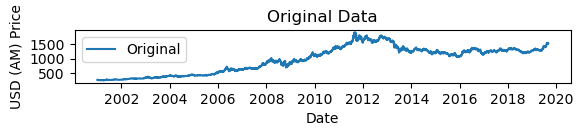

In [47]:
plt.subplot(6, 1, 1)
plt.plot(data['USD (AM)'], label='Original')
plt.legend(loc='best')
plt.title('Original Data')
plt.xlabel('Date')
plt.ylabel('USD (AM) Price')

Text(0, 0.5, 'Differenced USD (AM) Price')

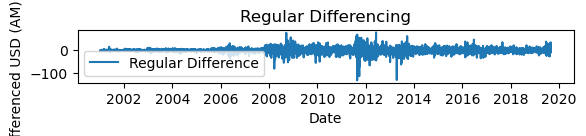

In [48]:
plt.subplot(6, 1, 2)
plt.plot(data['usd_am_diff'], label='Regular Difference')
plt.legend(loc='best')
plt.title('Regular Differencing')
plt.xlabel('Date')
plt.ylabel('Differenced USD (AM) Price')

Text(0, 0.5, 'Seasonally Adjusted USD (AM) Price')

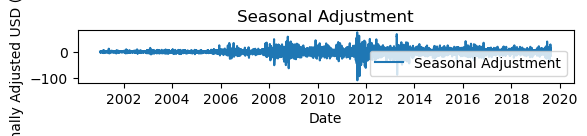

In [49]:
plt.subplot(6, 1, 3)
plt.plot(data['usd_am_sea_diff'], label='Seasonal Adjustment')
plt.legend(loc='best')
plt.title('Seasonal Adjustment')
plt.xlabel('Date')
plt.ylabel('Seasonally Adjusted USD (AM) Price')

Text(0, 0.5, 'Log(USD (AM) Price)')

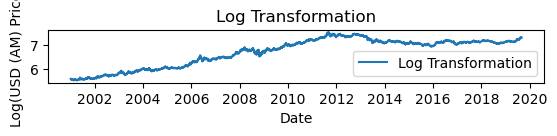

In [50]:
plt.subplot(6, 1, 4)
plt.plot(data['usd_am_log'], label='Log Transformation')
plt.legend(loc='best')
plt.title('Log Transformation')
plt.xlabel('Date')
plt.ylabel('Log(USD (AM) Price)')

Text(0, 0.5, 'Diff(Log(USD (AM) Price))')

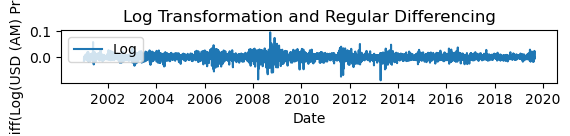

In [51]:
plt.subplot(6, 1, 5)
plt.plot(data['usd_am_log_diff'],label='Log')
plt.legend(loc='best')
plt.title('Log Transformation and Regular Differencing')
plt.xlabel('Date')
plt.ylabel('Diff(Log(USD (AM) Price))')

Text(0, 0.5, 'Diff(Diff(Log(USD (AM) Price)))')

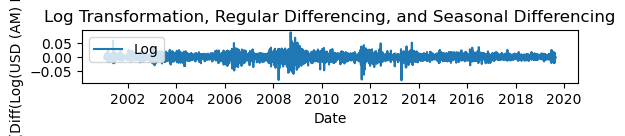

In [52]:
plt.subplot(6, 1, 6)
plt.plot(data['usd_am_log_seasonal_diff'], label='Log')
plt.legend(loc='best')
plt.title('Log Transformation, Regular Differencing, and Seasonal Differencing')
plt.xlabel('Date')
plt.ylabel('Diff(Diff(Log(USD (AM) Price)))')

In [53]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='Date'>

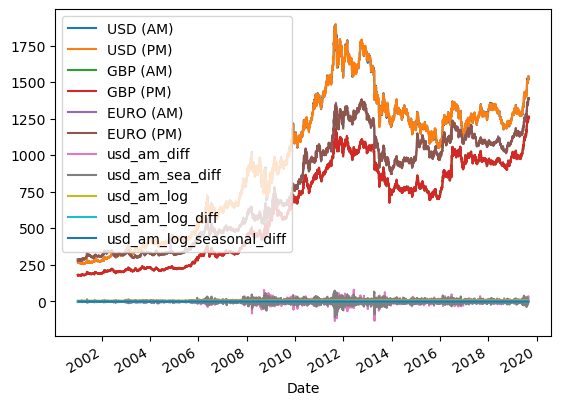

In [54]:
data.plot(kind='line')